## 1. DATAPREPROCESSING STEPS:


### 1.1 Importing the libraries & Loading the dataset:
- Importing essential libraries for data manipulation and text processing
- Load the dataset from the specified file path

In [2]:
import pandas as pd
import re
df = pd.read_csv('C:\\Users\\ADMIN\\FakeNewsNet.csv')
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


 ## 1.2 Converting text to lowercase:

In [3]:
df['title'] = df['title'].str.lower()
#df.head()

## 1.3 Removing links and newline characters:

In [4]:
def remove_links(text):
    if not isinstance(text, str):
        return text
    # Remove links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove newline characters
    text = text.replace('\n', ' ')
    return text

In [5]:
# Apply function to relevant columns
df['title'] = df['title'].apply(remove_links)
#df.head()

## 1.4 Removing words containing numbers and extra spaces:

In [6]:
def remove_extraSpace(text):
    if not isinstance(text, str):
        return text
    # Remove words containing numbers
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip() 

df['title'] = df['title'].apply(remove_extraSpace)

## 1.5 Removal of special characters:

In [7]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]',' ', text)
    return text
df['title'] = df['title'].apply(remove_spl_chars)

## 1.6 Removal of stopwords:
Stopwords are common words (like "the", "is") removed during text preprocessing to focus on meaningful content words, improving text analysis accuracy and efficiency

In [8]:
from nltk.corpus import stopwords
#", ".join(stopwords.words('english'))

In [9]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

df['title'] = df['title'].apply(remove_stopwords)


## 1.7 Stemming:
Stemming reduces words to their root form by removing prefixes and suffixes, simplifying text processing and enhancing the efficiency of text analysis.

In [10]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_word(text):
    return " ".join([ps.stem(word) for word in text.split()])
df['text'] = df['title'].apply(stem_word)

## 1.8 Lemmatization:
Lemmatization is a more sophisticated text normalization technique than stemming, aiming to transform words to their base or dictionary form (lemma), considering the word's context and meaning, which helps in improving accuracy in natural language processing tasks.

In [11]:
import nltk
from nltk import pos_tag
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}
     

def lemm_word(text):
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

In [12]:
df['text'] = df['text'].apply(lambda x: lemm_word(x))
df.head()

,title,news_url,source_domain,tweet_num,real,text
0,kandi burruss explodes rape accusation real ho...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1,kandi burruss explod rape accus real housew at...
1,people choice awards best red carpet looks,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1,peopl choic award best red carpet look
2,sophia bush sends sweet birthday message one t...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1,sophia bush send sweet birthday messag one tre...
3,colombian singer maluma sparks rumours inappro...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1,colombian singer maluma spark rumour inappropr...
4,gossip girl years later upper east siders shoc...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1,gossip girl year later upper east sider shock ...


In [17]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 2. Featuring Engineering
Feature extraction in text analytics refers to the process of converting textual data into numerical representations that machine learning algorithms can process. Techniques like TF-IDF and word embeddings are used to capture the importance and semantic relationships of words in documents, enabling effective model training and analysis by reducing dimensionality and preserving essential information.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['title']).toarray()
y = df['real']

In [37]:
# Print X and y shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (23196, 5000)
Shape of y: (23196,)


## 3. Model Building
### Step 1 : Data Splitting
Data Splitting (Train-Test-Validation): Splitting the dataset into training, testing, and validation sets allows you to:

- Train the model on the training set: This is where the model learns the patterns and relationships between features (text in this case) and labels (real or fake news).
- Test the model on the testing set: This helps evaluate how well the model generalizes to unseen data. It provides an estimate of the model's performance before deploying it to real-world scenarios.
- Validate the model on the validation set: This final check ensures that the model's performance metrics are reliable and not overly optimistic due to tuning on the testing set.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [30]:
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 10878
Validation set size: 5359
Test set size: 6959


In [31]:
print(f'Train data size: {X_train.shape}')

Train data size: (10878, 5000)


### step 2: Model Building
- Algorithm Selection: Choosing appropriate algorithms based on the nature of the problem (text classification) and the dataset size.
- Training the Models: Each algorithm learns different aspects of the data. For instance, SVM finds the best hyperplane to separate classes, Random Forest uses ensemble learning with decision trees, and Gradient Boosting builds models sequentially to correct errors.

## 3.1: SVM Model Building
Support Vector Machine (SVM) is a powerful supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates data points into different classes. SVM aims to maximize the margin between classes, which helps generalize well to unseen data. Despite its name, SVM can efficiently handle non-linear boundaries through kernel functions, transforming data into higher dimensions. This method makes SVM versatile in various domains, such as image recognition, text classification, and medical diagnosis. SVM's effectiveness lies in its ability to handle high-dimensional data and complex decision boundaries, though it can be sensitive to the choice of kernel and parameter tuning.



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Initialize SVM classifier

In [33]:
svm_clf = SVC(kernel='linear', random_state=42)

### Train the classifier

In [34]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Predict on the test set

In [35]:
y_pred = svm_clf.predict(X_test)

### accuracy score and confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8272740336255209
Confusion Matrix:
[[ 822  868]
 [ 334 4935]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.49      0.58      1690
           1       0.85      0.94      0.89      5269

    accuracy                           0.83      6959
   macro avg       0.78      0.71      0.73      6959
weighted avg       0.82      0.83      0.82      6959



## 3.2: Random Forest Model Building
Random Forest is an ensemble learning method that constructs multiple decision trees during training. Each tree in the forest operates independently, and the final prediction is determined by the majority vote of all trees (classification) or the average prediction (regression). Random Forest mitigates overfitting by averaging multiple weak learners, resulting in robust performance on both classification and regression tasks. It handles high-dimensional datasets well and is less prone to overfitting compared to individual decision trees. Random Forest is widely used in applications like recommendation systems, financial forecasting, and medical diagnostics due to its ability to capture complex interactions and feature importance.

In [39]:
from sklearn.ensemble import RandomForestClassifier

### Initialize Random Forest classifier

In [40]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

### Train the classifier

In [41]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict on the test set

In [42]:
y_pred_rf = rf_clf.predict(X_test)

### accuracy score and confusion matrix

In [43]:
### Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Generate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8144848397758299
Random Forest Confusion Matrix:
[[ 808  882]
 [ 409 4860]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.48      0.56      1690
           1       0.85      0.92      0.88      5269

    accuracy                           0.81      6959
   macro avg       0.76      0.70      0.72      6959
weighted avg       0.80      0.81      0.80      6959



## 3.3 Gradient Boosting Model Building
Gradient Boosting is another ensemble technique that sequentially builds a series of weak learners, typically decision trees, to correct errors made by previous models. It trains each subsequent model to predict the residuals (the difference between actual and predicted values) of the previous model. This iterative process minimizes the overall prediction error, leading to a strong predictive model. Gradient Boosting is effective in both regression and classification tasks, offering superior performance by focusing on difficult instances in the dataset. It's used in domains such as web search ranking, anomaly detection, and ecological modeling. However, Gradient Boosting can be computationally expensive and requires careful parameter tuning to prevent overfitting.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

### Initialize Gradient Boosting classifier

In [45]:
gb_clf = GradientBoostingClassifier(random_state=42)

### Train the classifier

In [46]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Predict on the test set

In [47]:
y_pred_gb = gb_clf.predict(X_test)

### accuracy score and confusion matrix

In [48]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)

cr_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(cr_gb)

Gradient Boosting Accuracy: 0.8016956459261388
Gradient Boosting Confusion Matrix:
[[ 435 1255]
 [ 125 5144]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.26      0.39      1690
           1       0.80      0.98      0.88      5269

    accuracy                           0.80      6959
   macro avg       0.79      0.62      0.63      6959
weighted avg       0.80      0.80      0.76      6959



# Visualization of Confusion Matrices

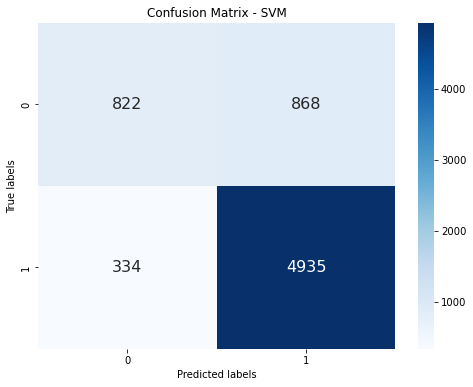

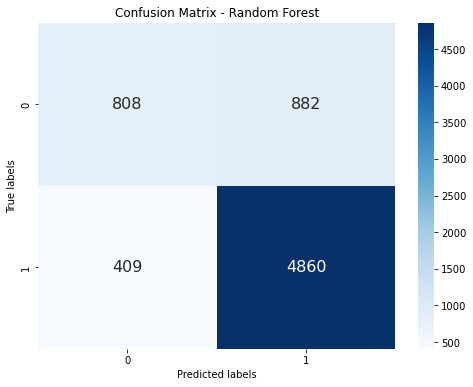

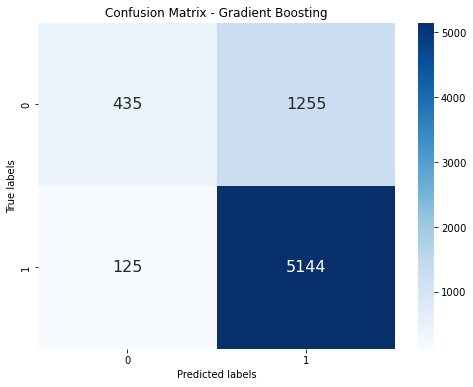

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# SVM Confusion Matrix
plot_confusion_matrix(cm, 'SVM')

# Random Forest Confusion Matrix
plot_confusion_matrix(cm_rf, 'Random Forest')

# Gradient Boosting Confusion Matrix
plot_confusion_matrix(cm_gb, 'Gradient Boosting')


## Comparison:
- Accuracy: SVM (82.73%) > Random Forest (81.45%) > Gradient Boosting (80.17%)
- Precision (Class 0): SVM (0.71) > Random Forest (0.66) > Gradient Boosting (0.78)
- Recall (Class 0): SVM (0.49) > Random Forest (0.48) > Gradient Boosting (0.26)
- F1-score (Class 0): SVM (0.58) > Random Forest (0.56) > Gradient Boosting (0.39)
- Precision (Class 1): SVM (0.85) = Random Forest (0.85) > Gradient Boosting (0.80)
- Recall (Class 1): SVM (0.94) > Random Forest (0.92) > Gradient Boosting (0.98)
- F1-score (Class 1): SVM (0.89) > Random Forest (0.88) > Gradient Boosting (0.88)

# Conclusion:
- The Support Vector Machine (SVM) model performs best for fake news detection with an accuracy of 0.83 and strong precision, recall, and F1-scores.
- The Random Forest model also shows competitive performance with an accuracy of 0.82 but slightly lower recall for class 0 (fake news).
- The Gradient Boosting model, while still effective, has the lowest accuracy at 0.80 and a significant drop in recall for class 0.
- Overall, SVM is the most balanced and accurate model for this task.

In [51]:
from joblib import dump

dump(vectorizer, 'vectorizer.joblib')
dump(svm_clf, 'svm_model.joblib')
dump(rf_clf, 'rf_model.joblib')
dump(gb_clf, 'gb_model.joblib')

['gb_model.joblib']